In [83]:
# Imports

import pandas as pd
import seaborn as sns
import seaborn.objects as so
from sympy.assumptions.handlers import order

In [84]:
# Reading the csv file

dataFrm = pd.read_csv("./res/dataset.csv", na_values=['Not Provided'])

In [85]:
# Displaying a sample of 100 rows

dataFrm.sample(100)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
107910,107910,3pr0y5h4MkBngy6gyozLDV,L'Impératrice,Tako Tsubo,Voodoo?,52,255746,False,0.871,0.379,...,-10.751,0,0.0752,0.085800,0.141000,0.0689,0.491,107.961,4,synth-pop
13517,13517,5ROzB0NW9yRDUoIPKG46GT,Fingers Inc.,Another Side,Decision,9,287602,False,0.846,0.881,...,-5.560,1,0.0680,0.129000,0.000000,0.0663,0.961,121.747,4,chicago-house
36574,36574,5Zp1zCKzXQGZxiBU2FGjdf,Youri,"Tsar Trap, Vol. 3",Tel Aviv,35,184616,True,0.655,0.607,...,-8.755,1,0.4420,0.003730,0.000000,0.1600,0.414,106.547,5,french
8359,8359,4XZWC34QJeJs7xvgt6I5kN,City Wolf,City Wolf,Hands Up,53,201438,False,0.513,0.879,...,-3.335,1,0.0681,0.046400,0.000000,0.2830,0.534,159.895,4,blues
69229,69229,7pq433DWGbLDY6RUt8BF47,Swetha,Mukunda,Nandalaala,35,249000,False,0.667,0.526,...,-7.916,1,0.0328,0.833000,0.166000,0.1060,0.689,87.975,4,malay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22859,22859,0DpNNwOcvYQcGdGNezAPN8,Children Of Bodom,Follow The Reaper,Hate Me,43,284733,True,0.444,0.977,...,-3.492,1,0.0605,0.000077,0.417000,0.1030,0.413,93.980,4,death-metal
23001,23001,1oIdcFtf58sZbS7QyZQJ2P,Deep Chills;IVIE,Run Free,Run Free,67,170562,False,0.727,0.690,...,-4.559,1,0.0345,0.202000,0.000003,0.4140,0.699,100.002,4,deep-house
91119,91119,5sIxLex6QZ5WgB0lnKblHz,Twenty One Pilots,All Out Alternative,Stressed Out,2,202333,False,0.735,0.638,...,-5.670,0,0.1390,0.045900,0.000024,0.0602,0.669,169.976,4,rock
92232,92232,6oM4ryXpuZmbFfBv2sEe7v,Brian Hyland,Chronology,Sealed With A Kiss,57,162160,False,0.449,0.362,...,-10.380,0,0.0279,0.743000,0.000000,0.1320,0.600,90.822,4,rockabilly


<Axes: >

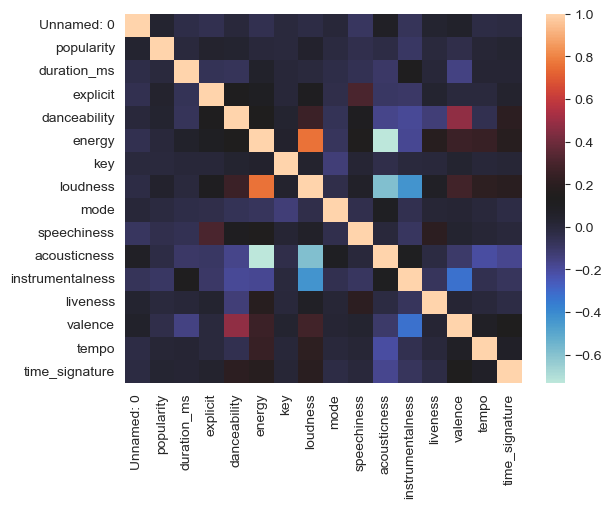

In [86]:
sns.heatmap(dataFrm.corr(numeric_only=True), cmap='icefire')

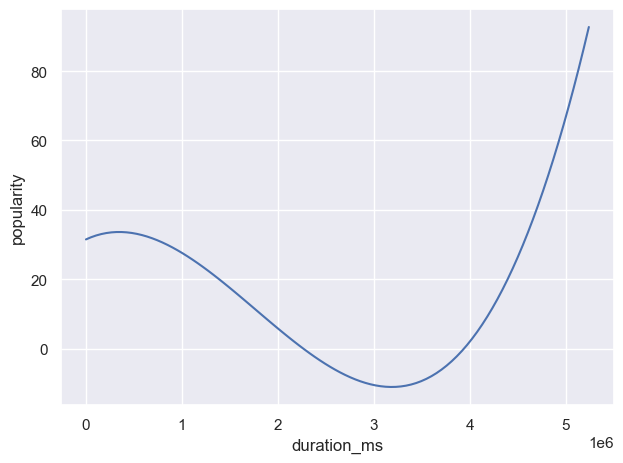

In [87]:
(
    so.Plot(dataFrm, x='duration_ms', y='popularity')
    .add(so.Line(), so.PolyFit(order=3))
    #.add(so.Dots()) # Alle Punkte
    .show()
)

# Erklärung:
# Dieses Plot zeigt, dass längere Tracks tendenziell beliebter sind.

# Basierend auf den Daten könnte das möglich sein, aber es ist nicht zwingend so.
# Laut den Daten, die vorhanden sind, werden kürzere Tracks mehr gehört. Aber da die wenigen Tracks die länger sind und gehört werden ein gutes Rating haben, ist es möglich, dass längere Tracks beliebter sind.


In [88]:
# Welche Genres sind am beliebtesten?

genres_popularity = dataFrm.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
top5_genres = genres_popularity.head(5)
most_least_popular_genres = pd.merge(top5_genres.head(1), genres_popularity.tail(1))

In [89]:
top5_genres

track_genre
pop-film    59.283
k-pop       56.896
chill       53.651
sad         52.379
grunge      49.594
Name: popularity, dtype: float64

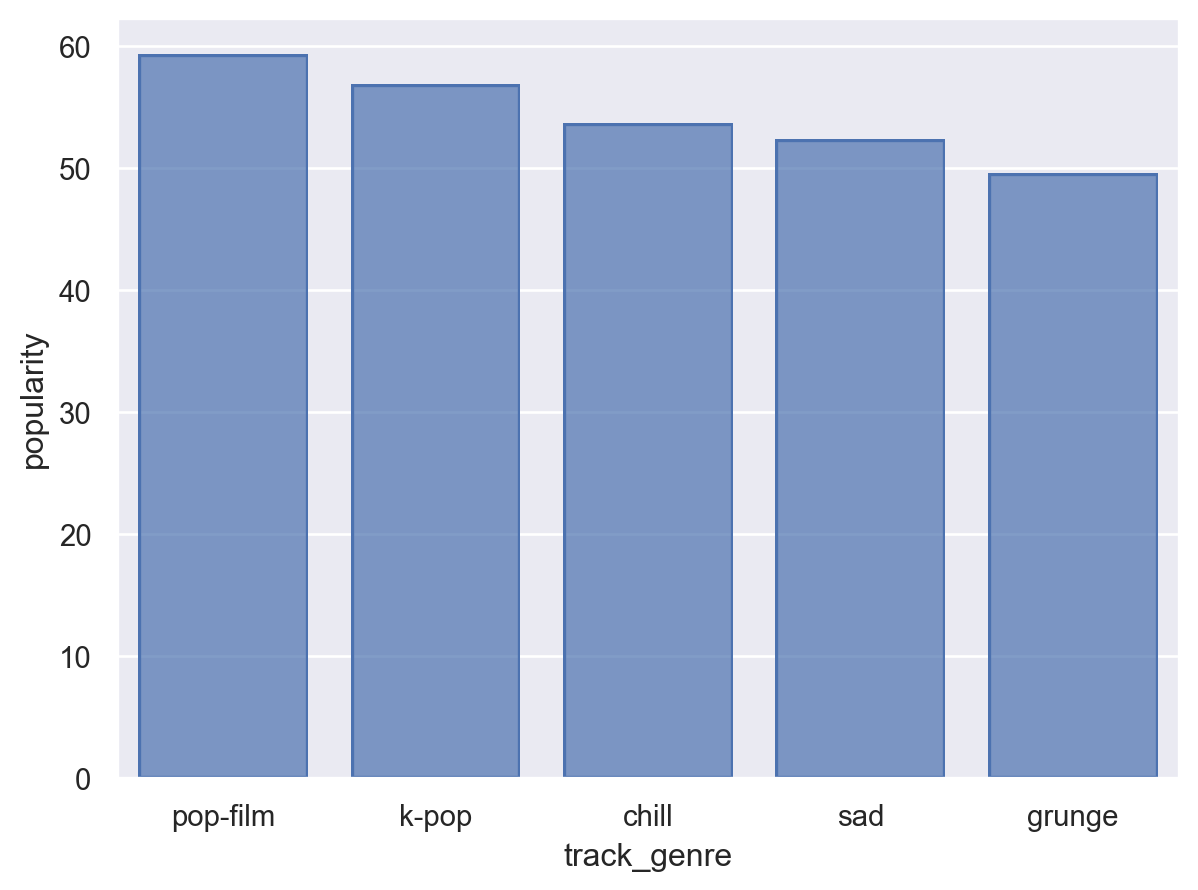

In [90]:
(
    so.Plot(pd.DataFrame(top5_genres), x="track_genre")
    .add(so.Bar(), so.Agg(), y="popularity")
)

# Erklärung:
# Zeigt die 5 beliebtesten Genres und deren Beliebtheit.

In [91]:
(
    so.Plot(pd.DataFrame(most_least_popular_genres), x="track_genre")
    .add(so.Bar(), so.Agg(), y="popularity")
)

# Erklärung:
# Zeigt das beliebteste und das am wenigsten beliebte Genre.

ValueError: Could not interpret value `track_genre` for `x`. An entry with this name does not appear in `data`.

In [66]:
dataFrm['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow